In [15]:
# Autoreload extension
#%load_ext autoreload    
#%autoreload 2

# Include local library paths
import sys, os
#cwd = os.getcwd()
cwd = '../../'
lib = 'lifecycles/'
pth = os.path.join(cwd, lib)
sys.path.append(pth)

import lifecycles as lcs
import pandas as pd
import plotly.express as px

In [16]:
import tnetwork as tn
from tnetwork import DCD

# Compute the groups

In [17]:
#tg = tn.graph_socioPatterns2012(format=tn.DynGraphSN)
tg = tn.graph_socioPatterns_Primary_School(format=tn.DynGraphSN)
#tg = tn.graph_socioPatterns_Hospital(format=tn.DynGraphSN)

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>


In [18]:
tg_day = tg.aggregate_time_period(period="hour")
#tg_day = tg.aggregate_sliding_window(60*60)

In [19]:
dyn_coms = DCD.iterative_match(tg_day)

  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


 90% (18 of 20) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

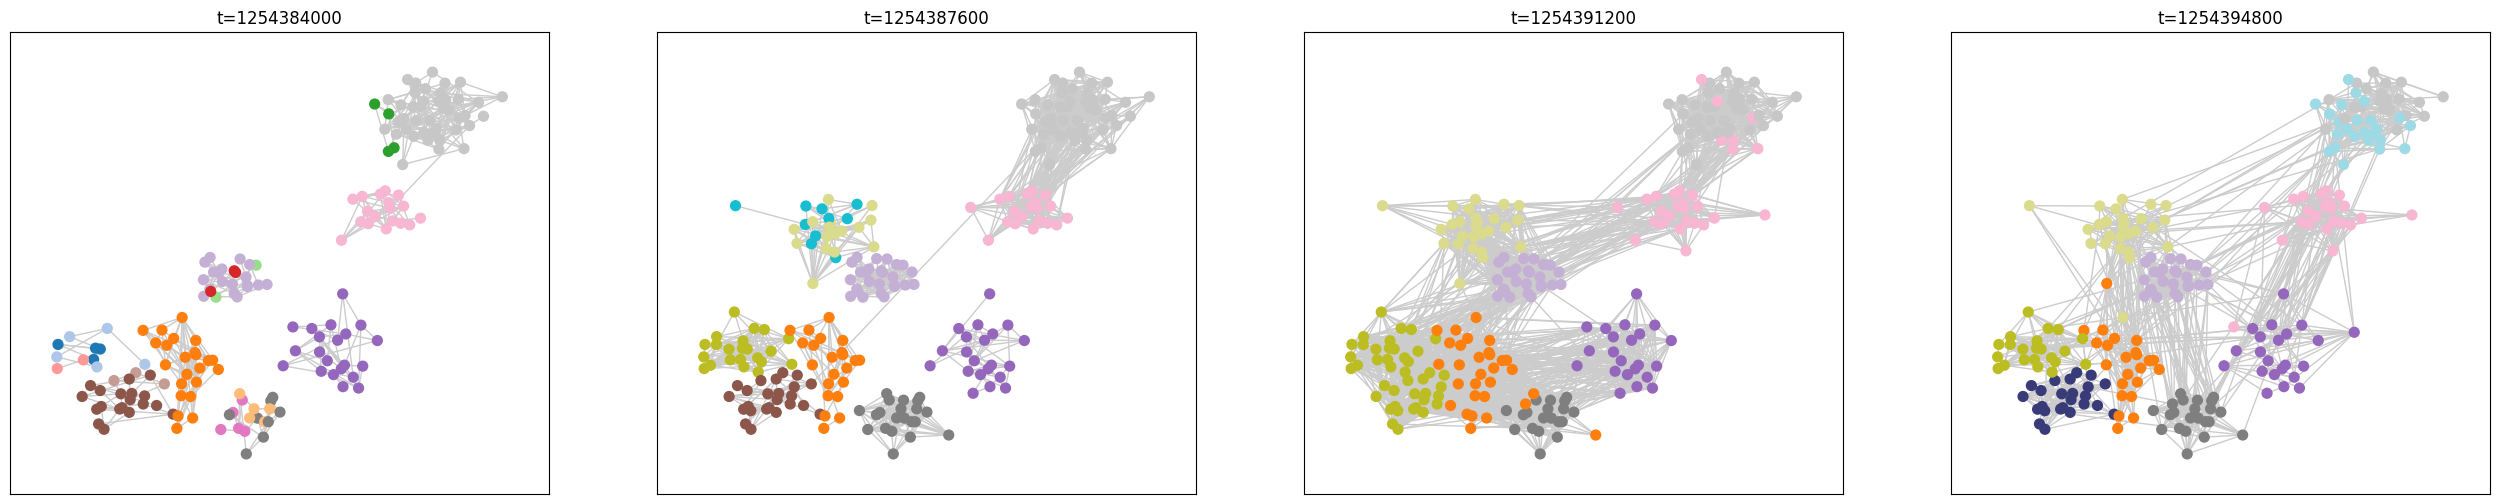

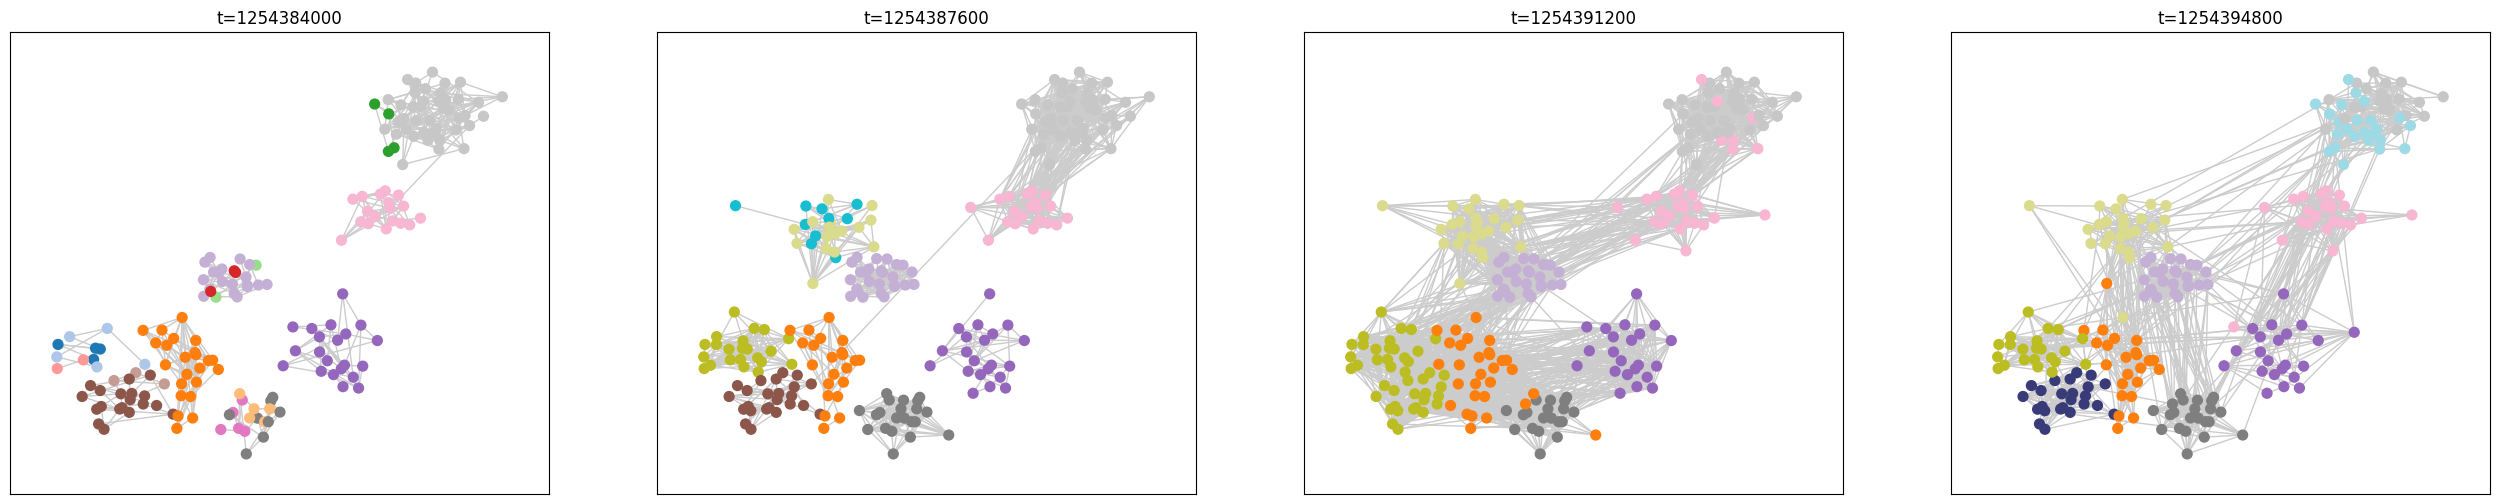

In [20]:
tn.plot_as_graph(tg_day,dyn_coms,ts=tg_day.snapshots_timesteps()[:4])

In [21]:
def dynamic_cluster_to_snaps(dyn_coms):
    """
    Convert a dynamic cluster to a list of snapshots
    :param dyn_coms: a dynamic community object
    :return: a list of snapshots
    """
    snaps = []
    for t in dyn_coms.snapshots.keys():
        snap = dyn_coms.snapshots[t]
        snaps.append(snap.values())
    return snaps

In [28]:
snapsDay = dynamic_cluster_to_snaps(dyn_coms)
snapsDay.insert(10,[])
#snapsDay.insert(0,[])
snapsDay.append([])


In [29]:
lc = lcs.LifeCycle(int)

In [30]:
lc.add_partitions_from(snapsDay)

In [31]:
lc.get_partition_at(13)

['13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_8']

# Visualize the flow

In [32]:
lc_start = lc.slice(0,4)

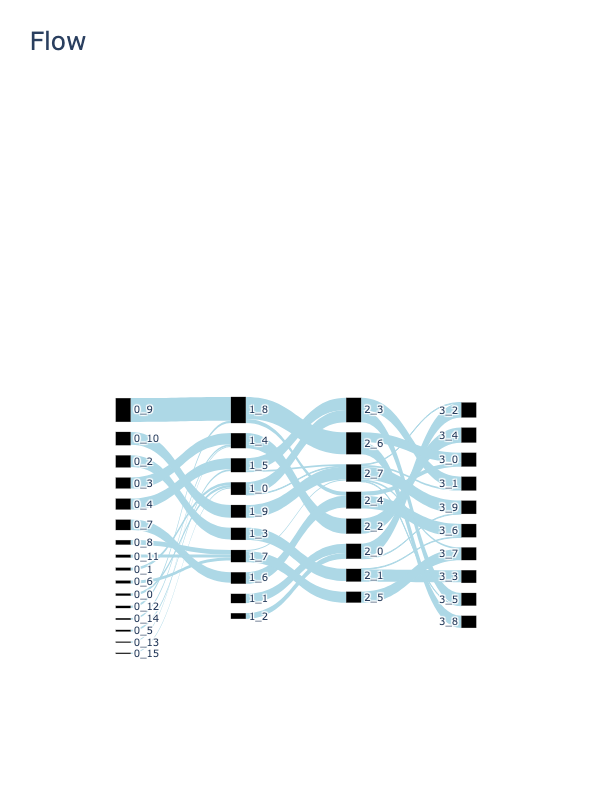

In [34]:
lcs.plot_flow(lc, slice=(0,4))

# Compute events 
According to our method and references

In [14]:
lcs.event_graph_greene(lc_start,0.1)

[(1, '1_0', '2_0', 0.18181818181818182),
 (1, '1_1', '2_0', 0.22727272727272727),
 (1, '1_2', '2_3', 0.9090909090909091),
 (1, '1_3', '2_4', 0.7307692307692307),
 (1, '1_4', '2_5', 0.7916666666666666),
 (1, '1_5', '2_5', 0.125),
 (1, '1_6', '2_7', 0.23809523809523808),
 (1, '1_7', '2_6', 0.9),
 (1, '1_8', '2_7', 0.38095238095238093),
 (1, '1_9', '2_8', 0.9111111111111111),
 (1, '1_10', '2_9', 0.9565217391304348),
 (1, '1_11', '2_7', 0.23809523809523808),
 (1, '1_14', '2_4', 0.11538461538461539),
 (2, '2_0', '3_3', 0.4883720930232558),
 (2, '2_1', '3_0', 0.6153846153846154),
 (2, '2_2', '3_0', 0.38461538461538464),
 (2, '2_3', '3_1', 0.9545454545454546),
 (2, '2_4', '3_2', 1.0),
 (2, '2_5', '3_3', 0.4666666666666667),
 (2, '2_6', '3_4', 0.6896551724137931),
 (2, '2_7', '3_5', 0.9047619047619048),
 (2, '2_8', '3_4', 0.1044776119402985),
 (2, '2_8', '3_6', 0.8444444444444444),
 (2, '2_9', '3_7', 0.7333333333333333),
 (3, '3_0', '4_2', 0.9259259259259259),
 (3, '3_1', '4_3', 0.913043478260

In [15]:
lcs.events_all(lc_start)

{'+': {'1_0': {'Death': 0.0,
   'Dispersion': 0.0,
   'Shrink': 0.0,
   'Reduction': 0.0,
   'Continue': 0.18181818181818182,
   'Split': 0.0,
   'Ancestor': 0.8181818181818181,
   'Disassemble': 0.0},
  '1_1': {'Death': 0.0,
   'Dispersion': 0.0,
   'Shrink': 0.0,
   'Reduction': 0.0,
   'Continue': 0.2272727272727273,
   'Split': 0.0,
   'Ancestor': 0.7727272727272727,
   'Disassemble': 0.0},
  '1_2': {'Death': 0.002267573696145127,
   'Dispersion': 0.0,
   'Shrink': 0.04535147392290249,
   'Reduction': 0.0,
   'Continue': 0.9070294784580498,
   'Split': 0.0,
   'Ancestor': 0.04535147392290254,
   'Disassemble': 0.0},
  '1_3': {'Death': 0.0,
   'Dispersion': 0.0,
   'Shrink': 0.0,
   'Reduction': 0.0,
   'Continue': 0.7307692307692308,
   'Split': 0.0,
   'Ancestor': 0.26923076923076916,
   'Disassemble': 0.0},
  '1_4': {'Death': 0.0,
   'Dispersion': 0.0,
   'Shrink': 0.0,
   'Reduction': 0.0,
   'Continue': 0.7916666666666666,
   'Split': 0.0,
   'Ancestor': 0.20833333333333337,
  

In [16]:
lcs.events_asur(lc_start)

{'merge': [{'src': '2_4',
   'type': 'merge',
   'score': 0.8076923076923077,
   'ref_sets': ['1_3', '1_13']},
  {'src': '2_4',
   'type': 'merge',
   'score': 0.8461538461538461,
   'ref_sets': ['1_3', '1_14']},
  {'src': '2_5',
   'type': 'merge',
   'score': 0.9166666666666666,
   'ref_sets': ['1_4', '1_5']},
  {'src': '2_7',
   'type': 'merge',
   'score': 0.6190476190476191,
   'ref_sets': ['1_6', '1_8']},
  {'src': '2_7',
   'type': 'merge',
   'score': 0.6190476190476191,
   'ref_sets': ['1_8', '1_11']},
  {'src': '2_8', 'type': 'merge', 'score': 1.0, 'ref_sets': ['1_9', '1_12']},
  {'src': '3_0', 'type': 'merge', 'score': 1.0, 'ref_sets': ['2_1', '2_2']},
  {'src': '3_3',
   'type': 'merge',
   'score': 0.9130434782608695,
   'ref_sets': ['2_0', '2_5']},
  {'src': '3_7',
   'type': 'merge',
   'score': 0.5227272727272727,
   'ref_sets': ['2_0', '2_9']},
  {'src': '3_7',
   'type': 'merge',
   'score': 0.5434782608695652,
   'ref_sets': ['2_5', '2_9']},
  {'src': '3_7',
   'type

# Detail checking for an event

In [17]:
lcs.facets(lc_start,"1_7","+")

{'U': 1, 'I': 0.8999999999999999, 'O': 0.0, 'size': 18}

In [18]:
lcs.event_weights(lc_start,"1_7","+")

{'Death': 0.0,
 'Dispersion': 0.0,
 'Shrink': 0.0,
 'Reduction': 0.0,
 'Continue': 0.8999999999999999,
 'Split': 0.0,
 'Ancestor': 0.10000000000000009,
 'Disassemble': 0.0}

In [19]:
lcs.event(lc_start,"1_7")

{'+': ('Continue', 0.8999999999999999), '-': ('Birth', 1.0)}

In [20]:
def plot_longitudinal_events_distribution(lc,weight_by_size=False,direction="+",return_df=False):
    """
    Plot the distribution of events over time
    
    :param lc: a lifecycle
    :param weight_by_size: if True, the size of the group is taken into account
    :param direction: the direction of the lifecycle (default is +, but can be - as well)
    :return: a dataframe with columns t,type,value
    """

    events_by_time = []
    for name,stats in lcs.events_all(lc)[direction].items():
        group_size = len(lc.get_group(name))
        t=name.split("_")[0]
        for type, value in stats.items():
            val=value
            if weight_by_size:
                val = val*group_size
            events_by_time.append((t,type,val))
    #transforom into a df, with columns t,type,value
    df = pd.DataFrame.from_records(events_by_time,columns=["t","type","value"])
    df = df.groupby(["t","type"]).sum().reset_index()
    #plot as stacked bar
    #df.plot(kind='bar', stacked=True, x="t", y="value", color="type")
    if return_df:
        return df
    else:
        fig = px.bar(df, x="t", y="value", color="type")
        fig.show()
    

In [68]:
#df = plot_longitudinal_events_distribution(lc,weight_by_size=True,return_df=True)
df = plot_longitudinal_events_distribution(lc,weight_by_size=True,return_df=True,direction="-")

In [69]:
df

,t,type,value
0,1,Accumulation,0.000000
1,1,Birth,182.000000
2,1,Continue,0.000000
3,1,Expansion,0.000000
4,1,Growth,0.000000
...,...,...,...
155,9,Expansion,2.184994
156,9,Growth,2.731916
157,9,Merge,13.660087
158,9,Offspring,4.443760


In [70]:
#extract real hours
hours = list(dyn_coms.snapshots.keys())
print(hours)
hours.insert(10,hours[9]+3600)
hours.insert(0,hours[0]-3600)
hours.append(hours[-1]+3600)

#convert from timestamp to datetime
hours = [pd.to_datetime(h,unit="s") for h in hours]
print(hours)
#replace the date in the df such that t=1 is the first element of hours list
df["t"] = df["t"].astype(int)
#df["t"] = df["t"]-df["t"].min()
df["t"] = df["t"].apply(lambda x: hours[x])

[1254384000, 1254387600, 1254391200, 1254394800, 1254398400, 1254402000, 1254405600, 1254409200, 1254412800, 1254416400, 1254470400, 1254474000, 1254477600, 1254481200, 1254484800, 1254488400, 1254492000, 1254495600, 1254499200, 1254502800]
[Timestamp('2009-10-01 07:00:00'), Timestamp('2009-10-01 08:00:00'), Timestamp('2009-10-01 09:00:00'), Timestamp('2009-10-01 10:00:00'), Timestamp('2009-10-01 11:00:00'), Timestamp('2009-10-01 12:00:00'), Timestamp('2009-10-01 13:00:00'), Timestamp('2009-10-01 14:00:00'), Timestamp('2009-10-01 15:00:00'), Timestamp('2009-10-01 16:00:00'), Timestamp('2009-10-01 17:00:00'), Timestamp('2009-10-01 18:00:00'), Timestamp('2009-10-02 08:00:00'), Timestamp('2009-10-02 09:00:00'), Timestamp('2009-10-02 10:00:00'), Timestamp('2009-10-02 11:00:00'), Timestamp('2009-10-02 12:00:00'), Timestamp('2009-10-02 13:00:00'), Timestamp('2009-10-02 14:00:00'), Timestamp('2009-10-02 15:00:00'), Timestamp('2009-10-02 16:00:00'), Timestamp('2009-10-02 17:00:00'), Timestamp(

/Users/andreafailla/miniconda3/envs/gt/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



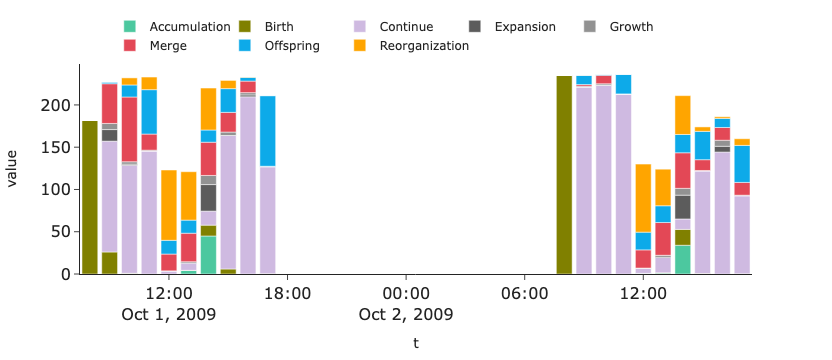

In [76]:
fig = px.bar(df, x="t", y="value", color='type', color_discrete_map=lcs.utils.colormap())
#replace x axis with hours
#fig.update_xaxes(type='category', categoryorder='array', categoryarray=hours)
#fig["layout"].update({"xaxis": {"tickformat": "%H:%M"}})
#plot every hour
#fig.update_xaxes(tickvals=hours, ticktext=hours, tickformat="%H:%M")
fig.update_layout(
    template='simple_white',
    legend=dict(
    orientation='h', 
    yanchor='bottom',
    y=1.02 ,
    xanchor='right', 
    x=.9,
    tracegroupgap=0,
    title=None,
    entrywidth=70,
    ),
    xaxis=dict(tickfont=dict(size=16)),  # Change the size as needed
    yaxis=dict(tickfont=dict(size=16)) ,  # Change the size as needed
)
fig.show()

/Users/andreafailla/miniconda3/envs/gt/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



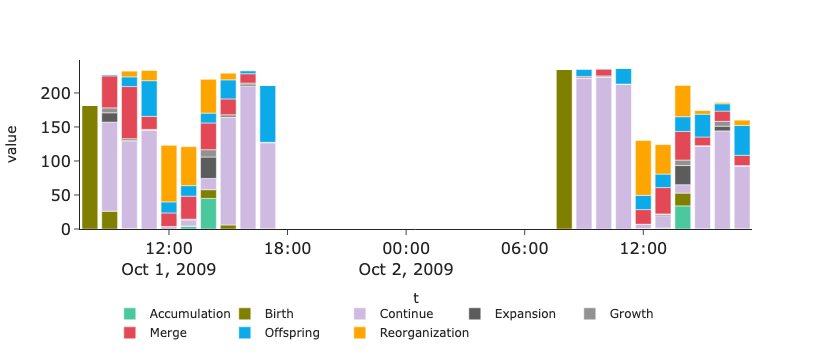

In [72]:
fig = px.bar(df, x="t", y="value", color='type', color_discrete_map=lcs.utils.colormap())
#replace x axis with hours
#fig.update_xaxes(type='category', categoryorder='array', categoryarray=hours)
#fig["layout"].update({"xaxis": {"tickformat": "%H:%M"}})
#plot every hour
#fig.update_xaxes(tickvals=hours, ticktext=hours, tickformat="%H:%M")
fig.update_layout(
    template='simple_white',
    legend=dict(
    orientation='h', 
    yanchor='bottom',
    y=-.7, 
    xanchor='right', 
    x=.9,
    tracegroupgap=0,
    title=None,
    entrywidth=70,
    ),
    xaxis=dict(tickfont=dict(size=16)),  # Change the size as needed
    yaxis=dict(tickfont=dict(size=16)) ,  # Change the size as needed
)
fig.show()

In [141]:

import numpy as np
from itertools import product
res = np.arange(0, 1.1, .3)
vals = list(product(*[res, res, res]))
x = pd.DataFrame(vals, columns=['I', 'O', 'U'])

In [142]:
evs = pd.DataFrame([
        (x["U"]) * (1 - x["I"]) * x["O"],
        (1 - x["U"]) * (1 - x["I"]) * x["O"],
        (x["U"]) * x["I"] * x["O"],
        (1 - x["U"]) * x["I"] * x["O"],
        (x["U"]) * x["I"] * (1 - x["O"]),
        (1 - x["U"]) * x["I"] * (1 - x["O"]),
        (x["U"]) * (1 - x["I"]) * (1 - x["O"]),
        (1 - x["U"]) * (1 - x["I"]) * (1 - x["O"]),
    ]).T
evs
evs.columns = lcs.backward_event_names()
evs['max_cat'] = evs[lcs.backward_event_names()].idxmax(axis=1)
evs

,Birth,Accumulation,Growth,Expansion,Continue,Merge,Offspring,Reorganization,max_cat
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,Reorganization
1,0.000,0.000,0.000,0.000,0.000,0.000,0.300,0.700,Reorganization
2,0.000,0.000,0.000,0.000,0.000,0.000,0.600,0.400,Offspring
3,0.000,0.000,0.000,0.000,0.000,0.000,0.900,0.100,Offspring
4,0.000,0.300,0.000,0.000,0.000,0.000,0.000,0.700,Reorganization
...,...,...,...,...,...,...,...,...,...
59,0.054,0.006,0.486,0.054,0.324,0.036,0.036,0.004,Growth
60,0.000,0.090,0.000,0.810,0.000,0.090,0.000,0.010,Expansion
61,0.027,0.063,0.243,0.567,0.027,0.063,0.003,0.007,Expansion
62,0.054,0.036,0.486,0.324,0.054,0.036,0.006,0.004,Growth


In [143]:
final =x.merge(evs, left_index=True, right_index=True)
final

,I,O,U,Birth,Accumulation,Growth,Expansion,Continue,Merge,Offspring,Reorganization,max_cat
0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,Reorganization
1,0.0,0.0,0.3,0.000,0.000,0.000,0.000,0.000,0.000,0.300,0.700,Reorganization
2,0.0,0.0,0.6,0.000,0.000,0.000,0.000,0.000,0.000,0.600,0.400,Offspring
3,0.0,0.0,0.9,0.000,0.000,0.000,0.000,0.000,0.000,0.900,0.100,Offspring
4,0.0,0.3,0.0,0.000,0.300,0.000,0.000,0.000,0.000,0.000,0.700,Reorganization
...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.9,0.6,0.9,0.054,0.006,0.486,0.054,0.324,0.036,0.036,0.004,Growth
60,0.9,0.9,0.0,0.000,0.090,0.000,0.810,0.000,0.090,0.000,0.010,Expansion
61,0.9,0.9,0.3,0.027,0.063,0.243,0.567,0.027,0.063,0.003,0.007,Expansion
62,0.9,0.9,0.6,0.054,0.036,0.486,0.324,0.054,0.036,0.006,0.004,Growth


/Users/andreafailla/miniconda3/envs/gt/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



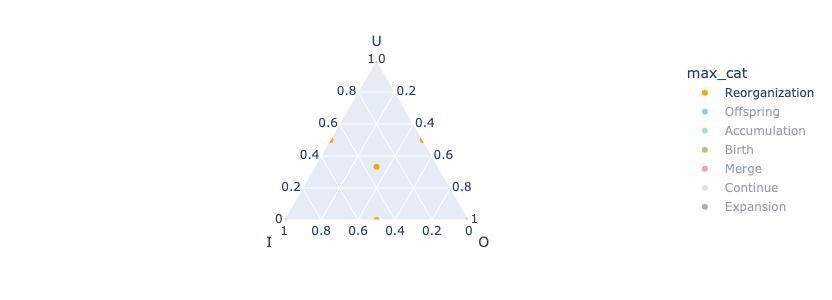

In [144]:
fig = px.scatter_ternary(final,
                             a="U", b="I", c="O",
                             color_discrete_map=lcs.utils.colormap(),
                             color='max_cat',
                             #hover_data=,
                            width=500, height=300
                            )
fig.show()